In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/easydata-processed/scaled_dtrain.csv
/kaggle/input/easydata-processed/scaled_dtest.csv
/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip
/kaggle/input/dayanddate2016/daydate.csv
/kaggle/input/historical-hourly-weather-data/weather_description.csv
/kaggle/input/historical-hourly-weather-data/pressure.csv
/kaggle/input/historical-hourly-weather-data/wind_speed.csv
/kaggle/input/historical-hourly-weather-data/city_attributes.csv
/kaggle/input/historical-hourly-weather-data/temperature.csv
/kaggle/input/historical-hourly-weather-data/wind_direction.csv
/kaggle/input/historical-hourly-weather-data/humidity.csv


In [124]:
myziptrain = '/kaggle/input/nyc-taxi-trip-duration/train.zip'
myziptest = '/kaggle/input/nyc-taxi-trip-duration/test.zip'
outputfile = '/kaggle/working/'

import zipfile
with zipfile.ZipFile(myziptrain,"r") as zip_ref:
    zip_ref.extractall(outputfile)
with zipfile.ZipFile(myziptest,"r") as zip_ref:
    zip_ref.extractall(outputfile)

# Initializing

In [125]:
import pandas as pd

dtrain = pd.read_csv('/kaggle/working/train.csv')

dtest = pd.read_csv('/kaggle/working/test.csv')

In [126]:
print(dtrain.columns, dtrain.shape)

print(dtest.columns, dtest.shape)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object') (1458644, 11)
Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object') (625134, 9)


In [127]:
dfull = pd.concat([dtrain,dtest],axis=0)

# Data Correlation

In [128]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt

def plotting_corr(data):
  data = data.copy()
  is_category = []
  #detecting if it is object
  for k,v in data.dtypes.items():
    if v == 'object':
      is_category.append(k)

  #make the features suitable for seeing in the correlation plot

  for each in is_category:
    data[each]= label_encoder.fit_transform(data[each])
  data_corr = data.corr().abs()[['trip_duration']]

  # Plotting the correlation matrix as a heatmap

  plt.figure(figsize=(6, 4))
  sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".3f")
  plt.title("Correlation Matrix")
  plt.show()

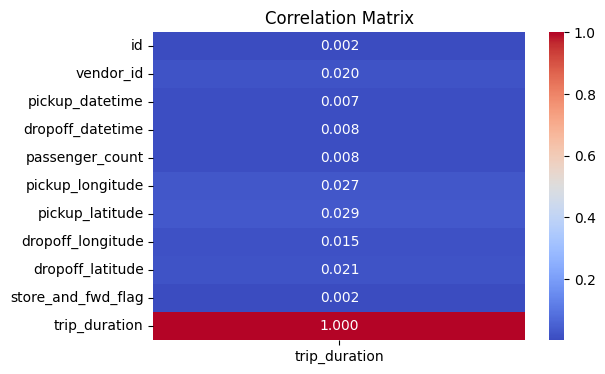

In [129]:
plotting_corr(dfull)

In [130]:
dfull.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [131]:
from datetime import date

df_process = dfull.copy()
df_process['Date_Pickup'], df_process['Time_Pickup'] = zip(*df_process['pickup_datetime'].str.split(' '))
df_process['Time_Pickup'] = df_process['Time_Pickup'].str.rpartition(':')[0]

#dfull['Time_Drop'], dfull['Date_Drop'] = zip(*dfull['dropoff_datetime'].str.split(' '))
#NaN returns TypeError: 'float' object is not iterable. Most probably, I  will drop this feature because i think of it no important.
df_process['Date_Pickup']=df_process['Date_Pickup'].apply(lambda x: x.split('-')[2]+'/'+x.split('-')[1]+'/'+x.split('-')[0])

In [132]:
df_process.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Date_Pickup,Time_Pickup
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,14/03/2016,17:24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,12/06/2016,00:43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,19/01/2016,11:35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,06/04/2016,19:32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,26/03/2016,13:30


In [133]:
datelink='/kaggle/input/dayanddate2016/daydate.csv'

x2= pd.read_csv(datelink)

x2.rename(columns={'Date':'Date_Pickup'},inplace = True)



df_process = pd.merge(df_process, x2[['Date_Pickup','Day','Holiday']], on='Date_Pickup', how='left')

In [134]:
df_process.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Date_Pickup,Time_Pickup,Day,Holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,14/03/2016,17:24,Monday,No
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,12/06/2016,00:43,Sunday,Yes
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,19/01/2016,11:35,Tuesday,No
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,06/04/2016,19:32,Wednesday,No
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,26/03/2016,13:30,Saturday,Yes


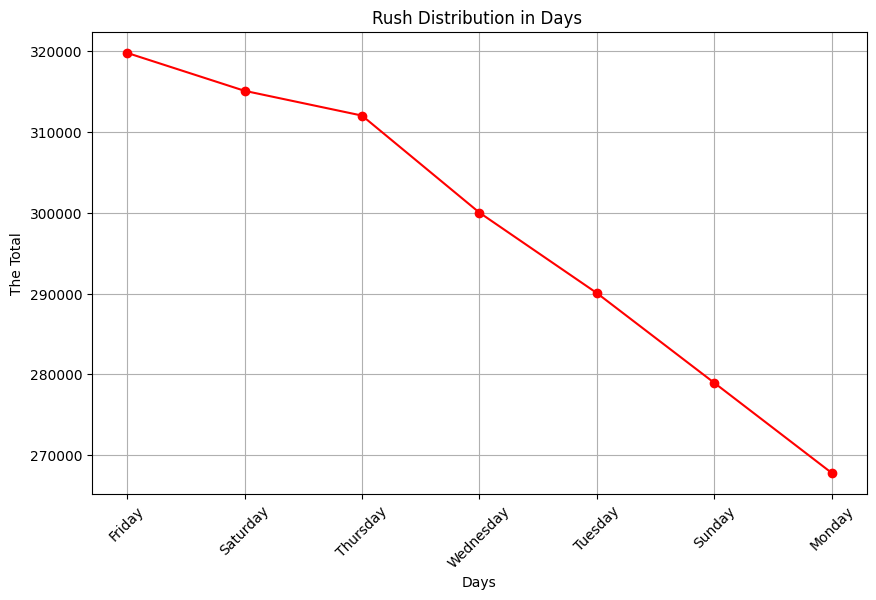

In [135]:
from pickle import TRUE

train_day_rush=df_process['Day'].value_counts()



train_day_rush.plot(kind='line', figsize=(10, 6),grid = True, style='ro-')

plt.title('Rush Distribution in Days ')

plt.xlabel('Days')

plt.ylabel('The Total')

plt.xticks(rotation=45)

plt.show()

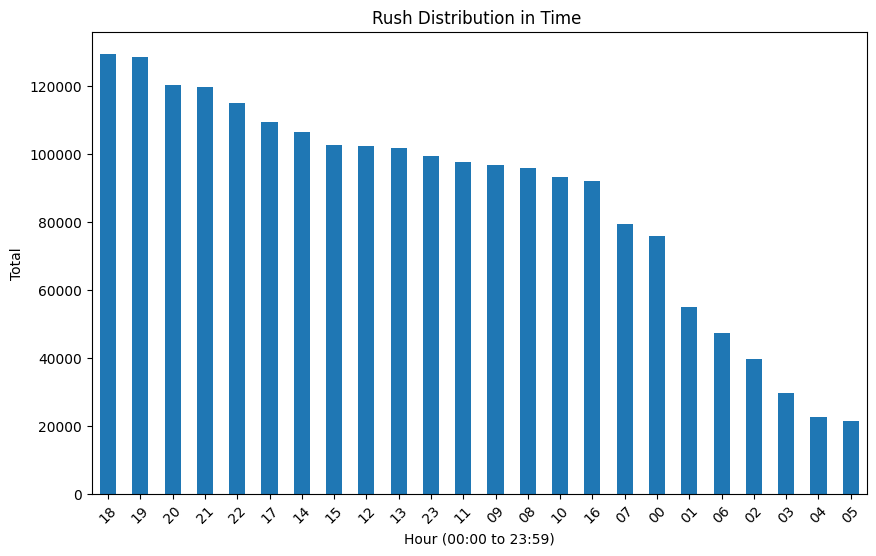

In [136]:
df_process['Hour']=df_process['Time_Pickup'].apply(lambda x: x.split(':')[0])

time_rush=df_process['Hour'].value_counts()



time_rush.plot(kind='bar', figsize=(10, 6))

plt.title('Rush Distribution in Time ')

plt.xlabel('Hour (00:00 to 23:59)')

plt.ylabel('Total')

plt.xticks(rotation=45)

plt.show()

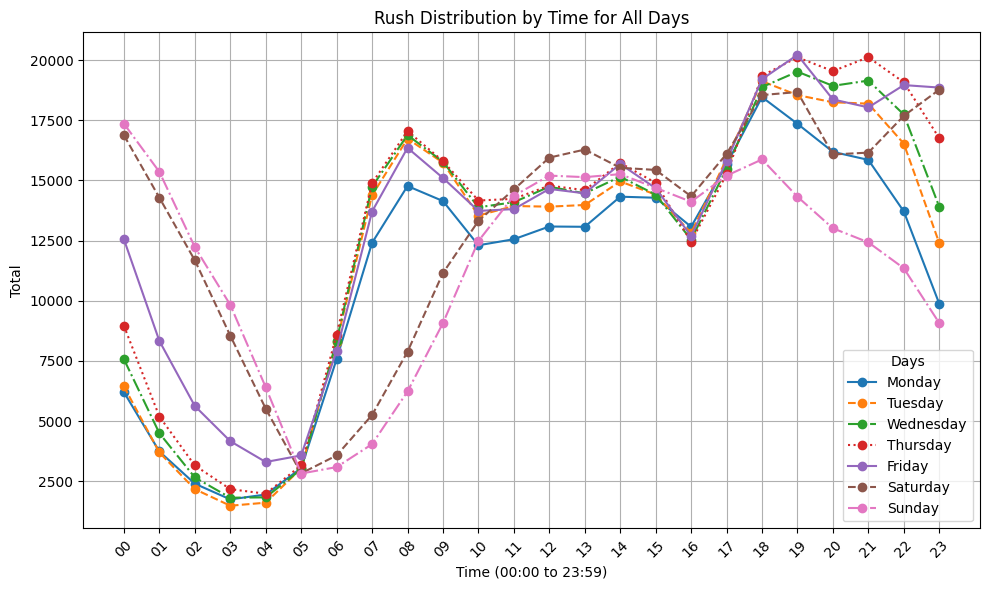

In [137]:
#from monday to sunday

#from 00:00 to 23_59



#days = list(df['Day'].unique())

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']



plt.figure(figsize=(10, 6))

styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']  # Different line styles



# Plot each day's data as a line

for i,each in enumerate(days):

    datam = df_process[df_process['Day'] == each]['Hour'].value_counts().sort_index()  # Ensure proper time order

    plt.plot(datam.index, datam.values, marker='o', label=each,linestyle=styles[i])



# Customize the graph

plt.title('Rush Distribution by Time for All Days')

plt.xlabel('Time (00:00 to 23:59)')

plt.ylabel('Total')

plt.xticks(rotation=45)

plt.legend(title='Days')

plt.grid(True)

plt.tight_layout()



# Show the plot

plt.show()

In [138]:
df_process.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Date_Pickup,Time_Pickup,Day,Holiday,Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,14/03/2016,17:24,Monday,No,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,12/06/2016,00:43,Sunday,Yes,00
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,19/01/2016,11:35,Tuesday,No,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,06/04/2016,19:32,Wednesday,No,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,26/03/2016,13:30,Saturday,Yes,13


# Analyse the data and PCA for coordinates

In [139]:
import numpy as np
myoutput = dtrain['trip_duration']

myoutput1  = np.log1p(dtrain['trip_duration'])

myoutput2 = np.log(dtrain['trip_duration'].values + 1)


In [140]:
dtrain['trip_duration'] = np.log1p(dtrain['trip_duration'])

Max:0.25min, Min:0.01min, Mean:0.11min


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


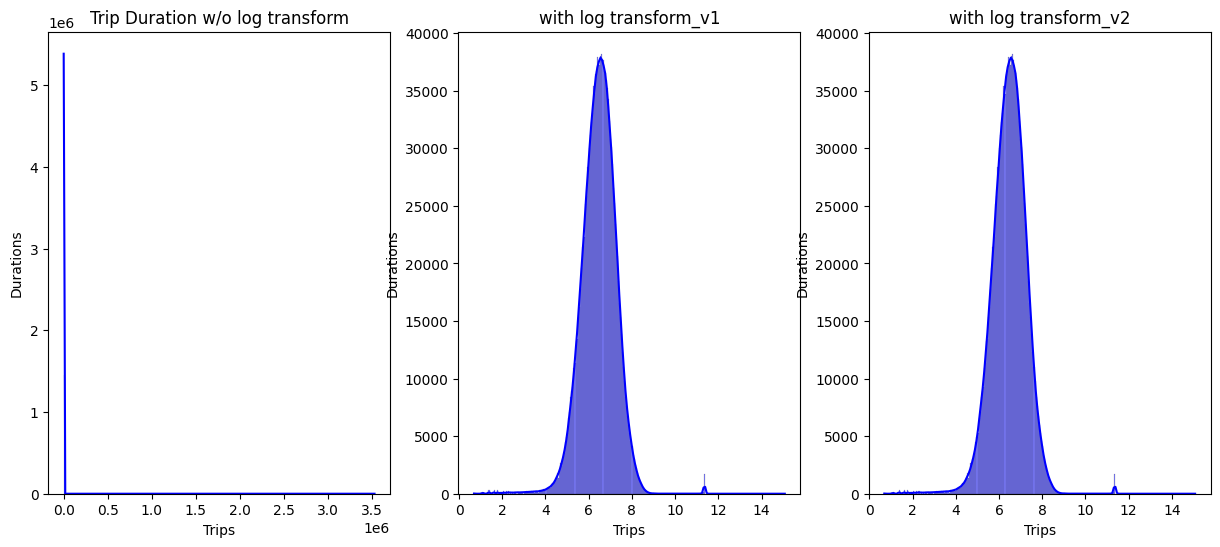

In [141]:
print('Max:{0}min, Min:{1}min, Mean:{2}min'.format(round(dtrain['trip_duration'].max()/60,2),round(dtrain['trip_duration'].min()/60,2),round(dtrain['trip_duration'].mean()/60,2)))


plt.figure(figsize= (15,6))



plt.subplot(1,3,1)

#myoutput = dtrain['trip_duration']

sns.histplot(myoutput,kde=True,color = 'blue',bins=300)

plt.title('Trip Duration w/o log transform')

plt.xlabel('Trips')

plt.ylabel('Durations')



plt.subplot(1,3,2)

#myoutput1  = np.log1p(dtrain['trip_duration'])

sns.histplot(myoutput1,kde=True,color = 'blue',bins=300)

plt.title('with log transform_v1')

plt.xlabel('Trips')

plt.ylabel('Durations')



plt.subplot(1,3,3)

#myoutput2 = np.log(dtrain['trip_duration'].values + 1)

sns.histplot(myoutput2,kde=True,color = 'blue',bins=300)

plt.title('with log transform_v2')

plt.xlabel('Trips')

plt.ylabel('Durations')



plt.show()

In [142]:
df_process['trip_duration_log'] = np.log1p(df_process['trip_duration'])

In [143]:
df_process.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Date_Pickup,Time_Pickup,Day,Holiday,Hour,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,14/03/2016,17:24,Monday,No,17,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,12/06/2016,00:43,Sunday,Yes,00,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,19/01/2016,11:35,Tuesday,No,11,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,06/04/2016,19:32,Wednesday,No,19,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,26/03/2016,13:30,Saturday,Yes,13,6.077642


In [144]:
dtest

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


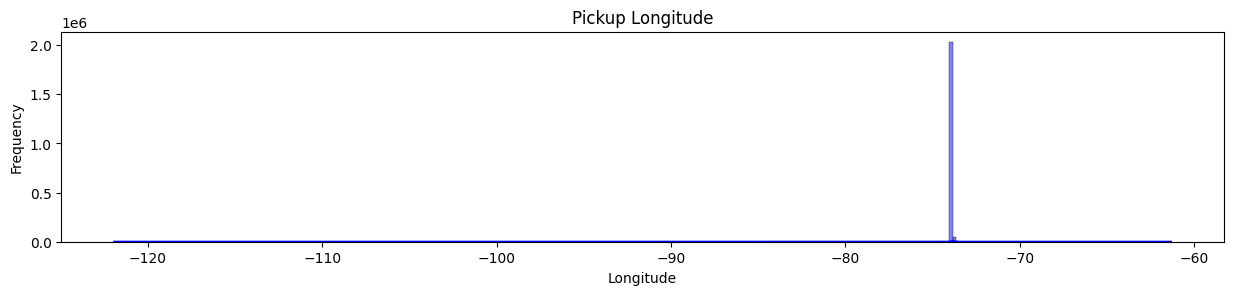

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


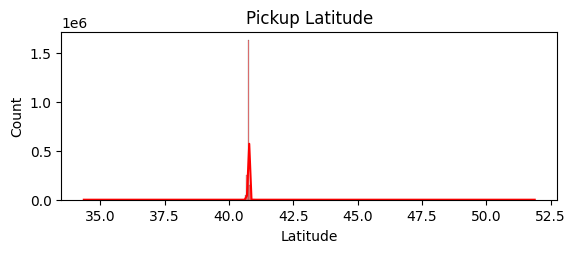

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


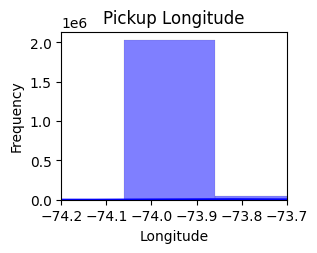

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


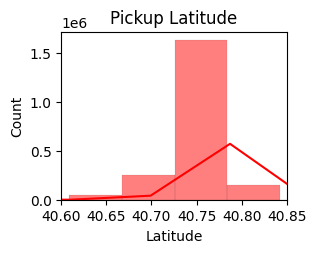

In [145]:
pick_long = df_process['pickup_longitude']

pick_lat = df_process['pickup_latitude']



plt.figure(figsize=(15, 6))



plt.subplot(2,1,1)

sns.histplot(pick_long,kde = True, color = 'blue',bins=300)

plt.title('Pickup Longitude')

plt.xlabel('Longitude')

plt.ylabel('Frequency')

plt.show()

plt.subplot(2,1,2)

sns.histplot(pick_lat,kde = True, color = 'red',bins=300)

plt.title('Pickup Latitude')

plt.xlabel('Latitude')

plt.show()

plt.subplot(2,2,1)

sns.histplot(pick_long,kde = True, color = 'blue',bins=300)

plt.title('Pickup Longitude')

plt.xlabel('Longitude')

plt.ylabel('Frequency')

plt.xlim((-74.2,-73.7))

plt.show()

plt.subplot(2,2,2)

sns.histplot(pick_lat,kde = True, color = 'red',bins=300)

plt.title('Pickup Latitude')

plt.xlabel('Latitude')

plt.xlim((40.6,40.85))

plt.show()

In [146]:
#meaningful range for latitude and longitude:

longitute_range = (-74.2,-73.7)

latitude_range = (40.6,40.85)

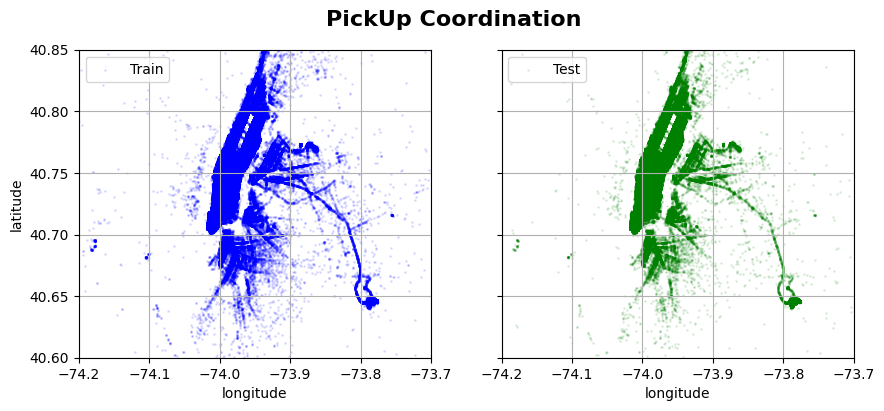

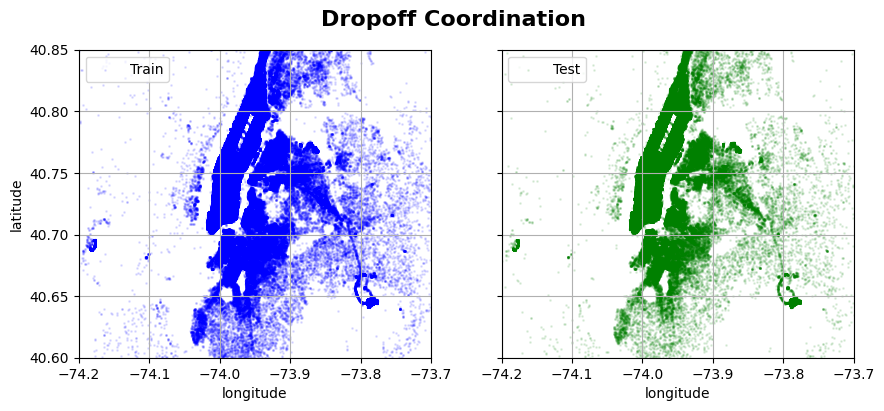

In [147]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)

fig1.suptitle('PickUp Coordination', fontsize=16, fontweight='bold')



ax1[0].scatter(dtrain['pickup_longitude'].values, dtrain['pickup_latitude'],

              color='blue', s=1, label='Train', alpha=0.1)

ax1[0].legend(loc='upper left')

ax1[0].set_xlabel('longitude')

ax1[0].set_ylabel('latitude')

ax1[0].grid(True)



ax1[1].scatter(dtest['pickup_longitude'].values, dtest['pickup_latitude'],

              color='green', s=1, label='Test', alpha=0.1)

ax1[1].set_xlabel('longitude')

ax1[1].legend(loc='upper left')

ax1[1].grid(True)

plt.ylim(latitude_range)

plt.xlim(longitute_range)

plt.show()



fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)

fig2.suptitle('Dropoff Coordination', fontsize=16, fontweight='bold')



ax2[0].scatter(dtrain['dropoff_longitude'].values, dtrain['dropoff_latitude'],

              color='blue', s=1, label='Train', alpha=0.1)

ax2[1].scatter(dtest['dropoff_longitude'].values, dtest['dropoff_latitude'],

              color='green', s=1, label='Test', alpha=0.1)



ax2[0].legend(loc='upper left')

ax2[0].set_xlabel('longitude')

ax2[0].set_ylabel('latitude')

ax2[0].grid(True)



ax2[1].legend(loc='upper left')

ax2[1].set_xlabel('longitude')

ax2[1].grid(True)





plt.ylim(latitude_range)

plt.xlim(longitute_range)

plt.show()

In [148]:
from sklearn.decomposition import PCA



#stack the sequence of each input arrays like below:

#sequence: train[pickup_lat],train[pickup_long], train for dropoff and the same thing for dtest

mycord = np.vstack((dtrain[['pickup_latitude', 'pickup_longitude']].values,

                    dtrain[['dropoff_latitude', 'dropoff_longitude']].values,

                    dtest[['pickup_latitude', 'pickup_longitude']].values,

                    dtest[['dropoff_latitude', 'dropoff_longitude']].values))



pca = PCA().fit(mycord)



explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)


[0.81757063 0.18242937]


[0.81757063 0.18242937]

[PCA1 PCA2] PCA1+PCA2 MUST BE 1.

* If you reduce the dimensions and keep only PCA1, you lose the variance explained by PCA2, which is 18.24%.

* You would retain 81.76% of the data's variance.



If I reduce the dimension, **18% of data will be lost**. I won't do it.

In [149]:


#pca for dtrain with pickup value and dropoff value

dtrain['pca1_pickup'] = pca.transform(dtrain[['pickup_latitude', 'pickup_longitude']])[:,0] #first principal component (PCA1)

dtrain['pca2_pickup'] = pca.transform(dtrain[['pickup_latitude', 'pickup_longitude']])[:,1] #second principal component (PCA2)



dtrain['pca1_dropoff'] = pca.transform(dtrain[['dropoff_latitude', 'dropoff_longitude']])[:,0]

dtrain['pca2_dropoff'] = pca.transform(dtrain[['dropoff_latitude', 'dropoff_longitude']])[:,1]



#pca for dtest with pickup values and dropoff value

dtest['pca1_pickup'] = pca.transform(dtest[['pickup_latitude', 'pickup_longitude']])[:,0]

dtest['pca2_pickup'] = pca.transform(dtest[['pickup_latitude', 'pickup_longitude']])[:,1]



dtest['pca1_dropoff'] = pca.transform(dtest[['dropoff_latitude', 'dropoff_longitude']])[:,0]

dtest['pca2_dropoff'] = pca.transform(dtest[['dropoff_latitude', 'dropoff_longitude']])[:,1]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has fe

In [150]:
dtrain.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pca1_pickup,pca2_pickup,pca1_dropoff,pca2_dropoff
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0.007691,0.017053,-0.009666,0.013695
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,0.007677,-0.012371,0.027145,-0.018652
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,0.004803,0.012879,0.034222,-0.039337
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,0.038342,-0.029194,0.041343,-0.042293
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,-0.002877,0.041749,-0.002380,0.031071


In [151]:
dtest.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pca1_pickup,pca2_pickup,pca1_dropoff,pca2_dropoff
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,0.015761,-0.018442,0.016356,0.006286
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,-0.005072,-0.071792,-0.008017,-0.096597
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,0.024727,-0.012352,0.013943,-0.021059
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,-0.018581,0.019480,0.014154,-0.020099
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,-0.003849,0.009902,-0.012212,0.003817


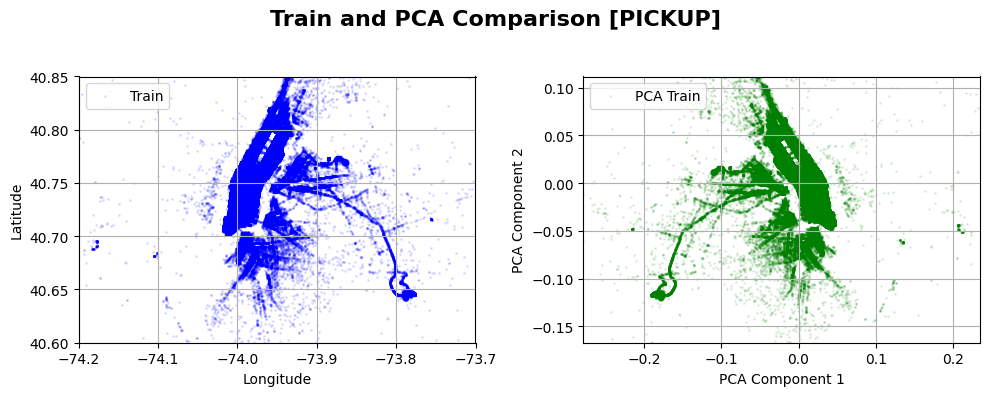

In [152]:
import numpy as np

import matplotlib.pyplot as plt



# Create a figure with 1 row and 2 columns

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False, sharey=False)

fig1.suptitle('Train and PCA Comparison [PICKUP]', fontsize=16, fontweight='bold')



# Subplot 1: Original Longitude and Latitude

ax1[0].scatter(dtrain['pickup_longitude'].values, dtrain['pickup_latitude'].values,

               color='blue', s=1, label='Train', alpha=0.1)

ax1[0].legend(loc='upper left')

ax1[0].set_xlabel('Longitude')

ax1[0].set_ylabel('Latitude')

ax1[0].set_ylim(latitude_range)

ax1[0].set_xlim(longitute_range)

ax1[0].grid(True)



# Subplot 2: PCA-transformed coordinates

ax1[1].scatter(dtrain['pca1_pickup'].values, dtrain['pca2_pickup'].values,

               color='green', s=1, label='PCA Train', alpha=0.1)

ax1[1].set_xlabel('PCA Component 1')

ax1[1].set_ylabel('PCA Component 2')

ax1[1].legend(loc='upper left')



# Transform range using PCA

latitude_grid = np.linspace(latitude_range[0], latitude_range[1], num=100)

longitude_grid = np.linspace(longitute_range[0], longitute_range[1], num=100)

grid_points = np.array([[x, y] for x in latitude_grid for y in longitude_grid])



pca_borders = pca.transform(grid_points)

ax1[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())

ax1[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

ax1[1].grid(True)



# Show the plots

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle

plt.show()


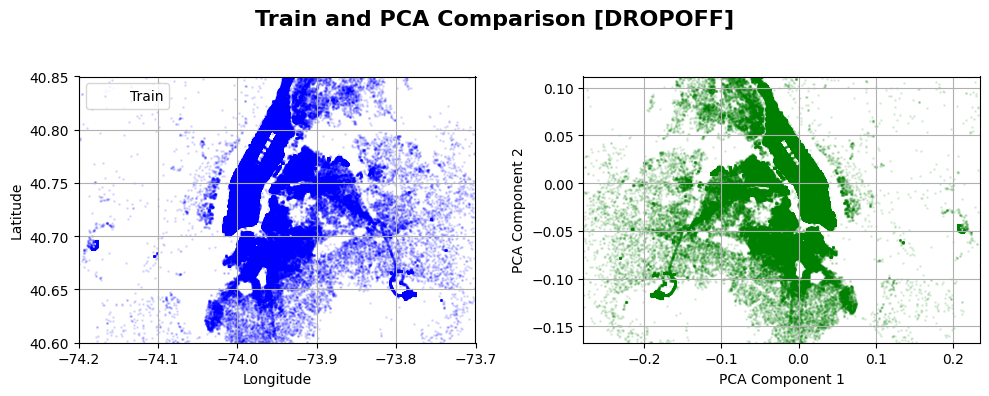

In [153]:
fig1,ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)

fig1.suptitle('Train and PCA Comparison [DROPOFF]', fontsize=16, fontweight='bold')

ax1[0].scatter(dtrain['dropoff_longitude'].values,dtrain['dropoff_latitude'].values,

           color='blue', s=1, label='Train', alpha=0.1)

ax1[0].legend(loc='upper left')

ax1[0].set_xlabel('Longitude')

ax1[0].set_ylabel('Latitude')

ax1[0].set_ylim(latitude_range)

ax1[0].set_xlim(longitute_range)

ax1[0].grid(True)



ax1[1].scatter(dtrain['pca1_dropoff'].values,dtrain['pca2_dropoff'].values,

           color='green', s=1, label='PCA Train', alpha=0.1)

ax1[1].set_xlabel('PCA Component 1')

ax1[1].set_ylabel('PCA Component 2')



ax1[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())

ax1[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

ax1[1].grid(True)



plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle

plt.show()








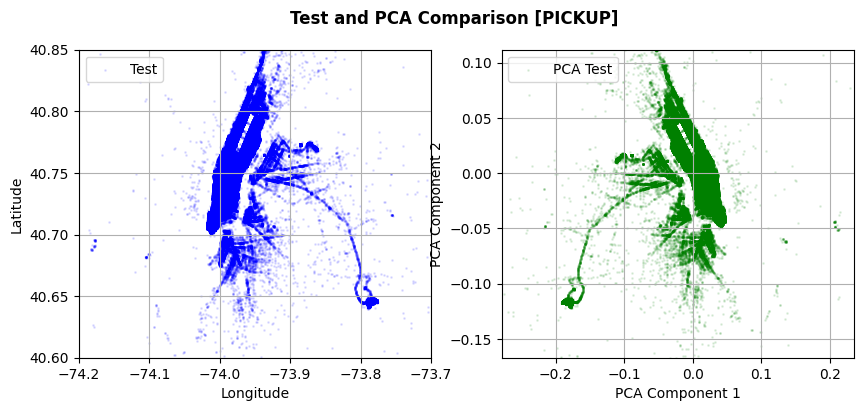

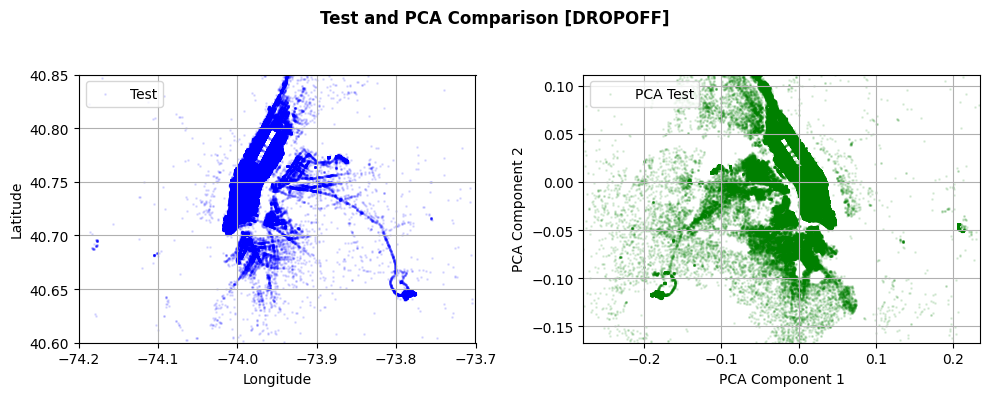

In [154]:
#last check for test:



fig1,ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)

fig1.suptitle('Test and PCA Comparison [PICKUP]', fontsize=12, fontweight='bold')

ax1[0].scatter(dtest['pickup_longitude'].values,dtest['pickup_latitude'].values,

              color='blue', s=1, label='Test', alpha=0.1)

ax1[0].legend(loc='upper left')

ax1[0].set_xlabel('Longitude')

ax1[0].set_ylabel('Latitude')

ax1[0].set_ylim(latitude_range)

ax1[0].set_xlim(longitute_range)

ax1[0].grid(True)



ax1[1].scatter(dtest['pca1_pickup'].values,dtest['pca2_pickup'].values,

              color='green', s=1, label='PCA Test', alpha=0.1)

ax1[1].legend(loc='upper left')

ax1[1].set_xlabel('PCA Component 1')

ax1[1].set_ylabel('PCA Component 2')

ax1[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())

ax1[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

ax1[1].grid(True)



fig2,ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=False, sharey=False)

fig2.suptitle('Test and PCA Comparison [DROPOFF]', fontsize=12, fontweight='bold')

ax2[0].scatter(dtest['pickup_longitude'].values,dtest['pickup_latitude'].values,

              color='blue', s=1, label='Test', alpha=0.1)

ax2[0].legend(loc='upper left')

ax2[0].set_xlabel('Longitude')

ax2[0].set_ylabel('Latitude')

ax2[0].set_ylim(latitude_range)

ax2[0].set_xlim(longitute_range)

ax2[0].grid(True)



ax2[1].scatter(dtest['pca1_dropoff'].values,dtest['pca2_dropoff'].values,

        color='green', s=1, label='PCA Test', alpha=0.1)

ax2[1].legend(loc='upper left')

ax2[1].set_xlabel('PCA Component 1')

ax2[1].set_ylabel('PCA Component 2')

ax2[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())

ax2[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

ax2[1].grid(True)



plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle

plt.show()


# Distance Measurements

In [155]:
def haversine(lat1, lon1, lat2, lon2):

    # Convert latitude and longitude from degrees to radians

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    a = np.sin((lat2 - lat1) / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1) / 2.0)**2

    distance = 6371 * 2 * np.arcsin(np.sqrt(a))

    return distance #km as unit

In [156]:
dtrain['h_distance']= haversine(dtrain['pickup_latitude'], dtrain['pickup_longitude'],

                                 dtrain['dropoff_latitude'], dtrain['dropoff_longitude'])



dtest['h_distance']= haversine(dtest['pickup_latitude'], dtest['pickup_longitude'],

                                 dtest['dropoff_latitude'], dtest['dropoff_longitude'])

In [157]:
def manhattan_distance(lat1, lon1, lat2, lon2):

    # Convert degrees to radians

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])



    R = 6371  # Earth's radius (km)



    delta_lat = np.abs(lat2 - lat1) * R

    delta_lon = np.abs(lon2 - lon1) * R * np.cos((lat1 + lat2) / 2)

    distance = delta_lat + delta_lon



    # Manhattan distance

    return distance

In [158]:
dtrain['m_distance']= manhattan_distance(dtrain['pickup_latitude'], dtrain['pickup_longitude'],

                                 dtrain['dropoff_latitude'], dtrain['dropoff_longitude'])



dtest['m_distance']= manhattan_distance(dtest['pickup_latitude'], dtest['pickup_longitude'],

                                 dtest['dropoff_latitude'], dtest['dropoff_longitude'])

In [159]:
dtrain.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pca1_pickup,pca2_pickup,pca1_dropoff,pca2_dropoff,h_distance,m_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0.007691,0.017053,-0.009666,0.013695,1.498521,1.735459
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,0.007677,-0.012371,0.027145,-0.018652,1.805507,2.430596
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,0.004803,0.012879,0.034222,-0.039337,6.385098,8.204472
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,0.038342,-0.029194,0.041343,-0.042293,1.485498,1.661350
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,-0.002877,0.041749,-0.002380,0.031071,1.188588,1.199458


In [160]:
def movement_direction (lat1, lon1, lat2, lon2):



  #Radian unit:

  lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

  delta_lon = lon2 - lon1

  y = np.sin(delta_lon) * np.cos(lat2)

  x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)

  direction = (np.degrees(np.arctan2(y, x)) + 360) % 360



  return direction





In [161]:
dtrain['direction']=movement_direction(dtrain['pickup_latitude'], dtrain['pickup_longitude'],

                                 dtrain['dropoff_latitude'], dtrain['dropoff_longitude'])



dtest['direction']=movement_direction(dtest['pickup_latitude'], dtest['pickup_longitude'],

                                 dtest['dropoff_latitude'], dtest['dropoff_longitude'])

In [162]:
dtrain

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pca1_pickup,pca2_pickup,pca1_dropoff,pca2_dropoff,h_distance,m_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,0.007691,0.017053,-0.009666,0.013695,1.498521,1.735459,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,0.007677,-0.012371,0.027145,-0.018652,1.805507,2.430596,242.846232
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,0.004803,0.012879,0.034222,-0.039337,6.385098,8.204472,200.319835
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,0.038342,-0.029194,0.041343,-0.042293,1.485498,1.661350,187.262300
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,-0.002877,0.041749,-0.002380,0.031071,1.188588,1.199458,179.473585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,0.009052,-0.005320,0.022054,-0.009918,1.225080,1.665938,240.940662
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,0.027656,-0.002366,-0.005937,0.044912,6.049836,8.057622,25.342196
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,-0.015345,0.016564,0.033483,-0.042102,7.824606,10.647409,209.211508
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,0.008722,-0.001794,0.000817,0.005801,1.092564,1.521812,35.033294


# Time&Date Split

In [163]:
print(type(dtrain['pickup_datetime'][0]))

print(dtrain['pickup_datetime'][0])

<class 'str'>
2016-03-14 17:24:55


In [164]:
x = pd.to_datetime(dtrain['pickup_datetime'])

print(type(x[0]))

print(x[0])


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-03-14 17:24:55


In [165]:
dtrain['pickup_datetime']= pd.to_datetime(dtrain['pickup_datetime'])

dtrain['dropoff_datetime']= pd.to_datetime(dtrain['dropoff_datetime'])

dtest['pickup_datetime']= pd.to_datetime(dtest['pickup_datetime'])

In [166]:
print(x[0].year)

print(x[0].month)

print(x[0].day)

print(x[0].hour)

print(x[0].minute)

print(x[0].dayofweek) # 0 is monday, 6 is sunday

print(x[0].isocalendar().week)

2016
3
14
17
24
0
11


In [167]:
dtrain['pick_month'] = dtrain['pickup_datetime'].dt.month

dtrain['pick_day'] = dtrain['pickup_datetime'].dt.day

dtrain['pick_hour'] = dtrain['pickup_datetime'].dt.hour

dtrain['pick_minute'] = dtrain['pickup_datetime'].dt.minute

dtrain['pick_dayofweek'] = dtrain['pickup_datetime'].dt.dayofweek

dtrain['pick_weekofyear'] = dtrain['pickup_datetime'].dt.isocalendar().week



dtest['pick_month'] = dtest['pickup_datetime'].dt.month

dtest['pick_day'] = dtest['pickup_datetime'].dt.day

dtest['pick_hour'] = dtest['pickup_datetime'].dt.hour

dtest['pick_minute'] = dtest['pickup_datetime'].dt.minute

dtest['pick_dayofweek'] = dtest['pickup_datetime'].dt.dayofweek

dtest['pick_weekofyear'] = dtest['pickup_datetime'].dt.isocalendar().week

In [168]:
dtrain.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pca2_dropoff,h_distance,m_distance,direction,pick_month,pick_day,pick_hour,pick_minute,pick_dayofweek,pick_weekofyear
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0.013695,1.498521,1.735459,99.970196,3,14,17,24,0,11
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,-0.018652,1.805507,2.430596,242.846232,6,12,0,43,6,23


In [169]:
dtest.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pca1_pickup,...,pca2_dropoff,h_distance,m_distance,direction,pick_month,pick_day,pick_hour,pick_minute,pick_dayofweek,pick_weekofyear
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,0.015761,...,0.006286,2.746426,2.913272,356.404776,6,30,23,59,3,26
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,-0.005072,...,-0.096597,2.759239,3.104874,172.278835,6,30,23,59,3,26


# Clustering

- Spatial Data (e.g., Latitude and Longitude)

- Movement Data (Direction and Speed)

# Spatial Data Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[58 23 66 51 20 60 84 77  6 55 48 43 94 65 38 35  8 95 76 91 19  0 16 64
 14 44 50 34 90 13 22 97 87 41 80 49 59 70  2 89 45 93 63  4 71  3 96 28
 18 47 78 98 86 24 32 40 46 88 30 92 82 57 69 75 29 56 61 39 67 26 54 99
 81 27 74 42 36  9 37  7 25 83 62 11 85 79 68 33 10  5 17 53 31 21  1 52
 73 72 15 12]


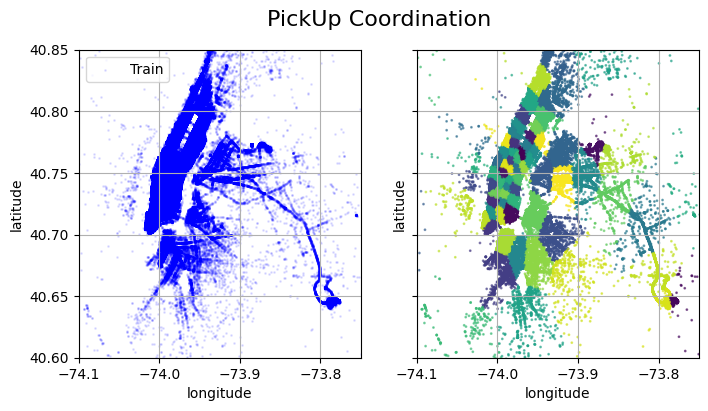

In [170]:
#Actual Value

fig1, ax1 = plt.subplots(nrows = 1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

fig1.suptitle('PickUp Coordination', fontsize=16)
ax1[0].scatter(dtrain['pickup_longitude'].values, dtrain['pickup_latitude'],
           color='blue', s=1, label='Train', alpha=0.1)
ax1[0].legend(loc='upper left')
ax1[0].set_xlabel('longitude')
ax1[0].set_ylabel('latitude')
ax1[0].set_ylim(latitude_range)
#longitute_range (-74.2, -73.7)
longitute_range_update = (-74.10, -73.75)
ax1[0].set_xlim(longitute_range_update)
ax1[0].grid(True)

#Clustering Value
from sklearn.cluster import KMeans
#extract the features to be clustered
datam = dtrain[['pickup_longitude', 'pickup_latitude']].values
kmeans = KMeans(n_clusters=100, random_state=42)
dtrain['pickup_cluster'] = kmeans.fit_predict(datam)
print(dtrain['pickup_cluster'].unique())

c = dtrain['pickup_cluster'] #classified by the number of n_cluster
ax1[1].scatter(dtrain['pickup_longitude'],dtrain['pickup_latitude'], c = c, cmap='viridis',s=1 ,alpha=0.6)
ax1[1].set_xlabel('longitude')
ax1[1].set_ylabel('latitude')
ax1[1].set_ylim(latitude_range)
ax1[1].set_xlim(longitute_range_update)
ax1[1].grid(True)
plt.show()


In [171]:
#for test

datam = dtest[['pickup_longitude', 'pickup_latitude']].values
kmeans = KMeans(n_clusters=100, random_state=42)
dtest['pickup_cluster'] = kmeans.fit_predict(datam)

datam = dtest[['dropoff_longitude', 'dropoff_latitude']].values
kmeans = KMeans(n_clusters=100, random_state=42)
dtest['dropoff_cluster'] = kmeans.fit_predict(datam)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [172]:
cluster_counts = dtrain['pickup_cluster'].value_counts()

print(cluster_counts)

pickup_cluster
6     68200
38    57492
66    51585
84    47011
0     43969
      ...  
68        1
79        1
25        1
37        1
12        1
Name: count, Length: 100, dtype: int64


**It means that the cluster number of 53 means that it is most crowded location in picking up.**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 0 55 87 41  7 84 99 97 82 43 86 25 96 29 35 52 63 19 71  6 36 70  2 14
 78 46 49 66 30 94 60 72 24 93 73 53 57 20 27 15 90 10  8 88 13 62 11 28
 16 59 81 85 92 40 61 79 74 75 32 31 44 51 68 33 83 56 76 95  3 42 50 58
 22 48 77 89 38 18 37 21 67 47  5 64 98 80 39 54 45  4 34 23 17  9 65 12
  1 69 91 26]


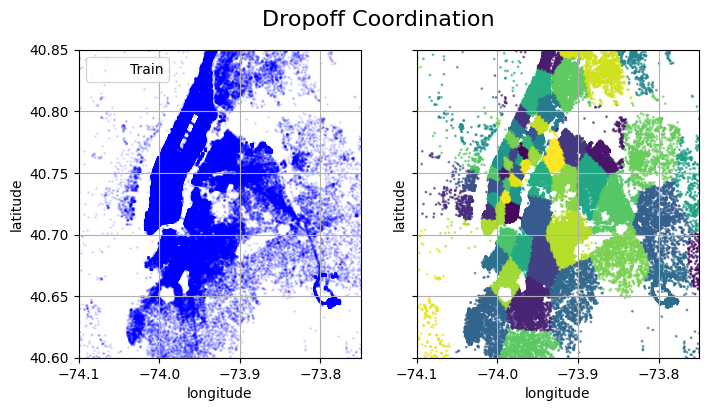

In [173]:
#Actual Value

fig1, ax1 = plt.subplots(nrows = 1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

fig1.suptitle('Dropoff Coordination', fontsize=16)



ax1[0].scatter(dtrain['dropoff_longitude'].values, dtrain['dropoff_latitude'],

           color='blue', s=1, label='Train', alpha=0.1)

ax1[0].legend(loc='upper left')

ax1[0].set_xlabel('longitude')

ax1[0].set_ylabel('latitude')

ax1[0].set_ylim(latitude_range)

#longitute_range (-74.2, -73.7)

longitute_range_update = (-74.10, -73.75)

ax1[0].set_xlim(longitute_range_update)

ax1[0].grid(True)



#Clustering Value

from sklearn.cluster import KMeans

#extract the features to be clustered

datam = dtrain[['dropoff_longitude', 'dropoff_latitude']].values



kmeans = KMeans(n_clusters = 100, random_state = 42)

dtrain['dropoff_cluster'] = kmeans.fit_predict(datam)





print(dtrain['dropoff_cluster'].unique())

c = dtrain['dropoff_cluster'] #classified by the number of n_cluster

ax1[1].scatter(dtrain['dropoff_longitude'],dtrain['dropoff_latitude'], c = c, cmap='viridis',s=1 ,alpha=0.6)

ax1[1].set_xlabel('longitude')

ax1[1].set_ylabel('latitude')

ax1[1].set_ylim(latitude_range)

ax1[1].set_xlim(longitute_range_update)

ax1[1].grid(True)

plt.show()


In [174]:
print(dtrain['dropoff_cluster'].value_counts())

dropoff_cluster
25    76479
7     70442
82    63907
57    60173
20    58260
      ...  
54        1
21        1
80        1
98        1
26        1
Name: count, Length: 100, dtype: int64


In [175]:
dtrain.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,m_distance,direction,pick_month,pick_day,pick_hour,pick_minute,pick_dayofweek,pick_weekofyear,pickup_cluster,dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.735459,99.970196,3,14,17,24,0,11,58,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2.430596,242.846232,6,12,0,43,6,23,23,55
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,8.204472,200.319835,1,19,11,35,1,3,66,87
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.661350,187.262300,4,6,19,32,2,14,51,87
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.199458,179.473585,3,26,13,30,5,12,20,41


# Direction Clustering 

In [176]:
#Clustering Value for Train and Test
from sklearn.cluster import KMeans
#extract the features to be clustered
datam = dtrain[['direction']].values

kmeans = KMeans(n_clusters=100, random_state=42)
dtrain['direction_cluster'] = kmeans.fit_predict(datam)
print(dtrain['direction_cluster'].unique())

#extract the features to be clustered
datam = dtest[['direction']].values
kmeans = KMeans(n_clusters = 100, random_state = 42)
dtest['direction_cluster'] = kmeans.fit_predict(datam)
print(dtest['direction_cluster'].unique())


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[21 34 66 35 17 87 61 29 38 64 56 13  5 19 63 32 54 43 28  1 30  0 68 55
 36 37 72 40 80 96 22 74 77 97 79 60 58 39 24  9 83 85 12 98 52 50 73 94
 27 48 81  6 33 82 57 42 75 10 31 90 25 16 69 45  8 23 70 95 71 53  2 59
 84 92 11 86 99 14 44  7 41 47 18 67  3 26  4 62 46 88 65 76 15 51 89 20
 93 91 49 78]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[52 58 44 12 27 33 86 48  8 39 22  5 45  4 23 73 72 25 65 57 77 83 28 35
  1 56 76 34 62  0 37 70 59 78 36  7 87 41 93 84 75 89 80 30 99 38 97 88
 69 18 15 13 53 46 10 50 60 29 79 90 96 16 82 40 49 61 14 17  3 94 24 21
 63 98 43 54 51  6 91 68 95 32 64 31 26 74  9  2 55 42 81 92 19 66 71 47
 11 20 67 85]


In [177]:
list(set(dtrain.columns)- set(dtest.columns))

['trip_duration', 'dropoff_datetime']

# Model Preparing

In [178]:
dtrain

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,direction,pick_month,pick_day,pick_hour,pick_minute,pick_dayofweek,pick_weekofyear,pickup_cluster,dropoff_cluster,direction_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,99.970196,3,14,17,24,0,11,58,0,21
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,242.846232,6,12,0,43,6,23,23,55,34
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,200.319835,1,19,11,35,1,3,66,87,66
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,187.262300,4,6,19,32,2,14,51,87,35
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,179.473585,3,26,13,30,5,12,20,41,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,240.940662,4,8,13,31,4,14,60,29,69
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,25.342196,1,10,7,35,6,1,63,14,25
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,209.211508,4,22,6,57,4,16,48,87,28
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,35.033294,1,5,15,56,1,1,95,57,1


In [179]:
y = dtrain['trip_duration']

In [180]:
train_nodesire_data = ['id','pickup_datetime','dropoff_datetime','trip_duration']
train_feature = list(set(dtrain.columns) - set(train_nodesire_data))
print(len(train_feature))
test_nodesire_data = ['id','pickup_datetime']
test_feature = list(set(dtest.columns) - set(test_nodesire_data))
print(len(test_feature))


23
23


In [181]:
X =dtrain[train_feature] 
test = dtest[test_feature]

In [182]:
set(dtrain['store_and_fwd_flag'])

X['store_and_fwd_flag'] = X['store_and_fwd_flag'].map({'N':0, 'Y':1})
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map({'N':0, 'Y':1})

/tmp/ipykernel_30/711805414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['store_and_fwd_flag'] = X['store_and_fwd_flag'].map({'N':0, 'Y':1})
/tmp/ipykernel_30/711805414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map({'N':0, 'Y':1})


In [183]:
set(test['store_and_fwd_flag'])

{0, 1}

In [184]:
X

,pickup_latitude,pick_day,dropoff_cluster,pick_minute,pca2_pickup,pick_dayofweek,pick_month,passenger_count,pickup_longitude,pca2_dropoff,...,m_distance,pca1_dropoff,dropoff_longitude,pick_hour,pca1_pickup,dropoff_latitude,direction,pick_weekofyear,pickup_cluster,direction_cluster
0,40.767937,14,0,24,0.017053,0,3,1,-73.982155,0.013695,...,1.735459,-0.009666,-73.964630,17,0.007691,40.765602,99.970196,11,58,21
1,40.738564,12,55,43,-0.012371,6,6,1,-73.980415,-0.018652,...,2.430596,0.027145,-73.999481,0,0.007677,40.731152,242.846232,23,23,34
2,40.763939,19,87,35,0.012879,1,1,1,-73.979027,-0.039337,...,8.204472,0.034222,-74.005333,11,0.004803,40.710087,200.319835,3,66,66
3,40.719971,6,87,32,-0.029194,2,4,1,-74.010040,-0.042293,...,1.661350,0.041343,-74.012268,19,0.038342,40.706718,187.262300,14,51,35
4,40.793209,26,41,30,0.041749,5,3,1,-73.973053,0.031071,...,1.199458,-0.002380,-73.972923,13,-0.002877,40.782520,179.473585,12,20,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,40.745522,8,29,31,-0.005320,4,4,4,-73.982201,-0.009918,...,1.665938,0.022054,-73.994911,13,0.009052,40.740170,240.940662,14,60,69
1458640,40.747379,10,14,35,-0.002366,6,1,1,-74.000946,0.044912,...,8.057622,-0.005937,-73.970184,7,0.027656,40.796547,25.342196,1,63,25
1458641,40.768799,22,87,57,0.016564,4,4,1,-73.959129,-0.042102,...,10.647409,0.033483,-74.004433,6,-0.015345,40.707371,209.211508,16,48,28
1458642,40.749062,5,57,56,-0.001794,1,1,1,-73.982079,0.005801,...,1.521812,0.000817,-73.974632,15,0.008722,40.757107,35.033294,1,95,1


In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
scaled_dtrain = pd.DataFrame(scaled_X, columns=X.columns)

scaled_test = scaler.fit_transform(test)
scaled_dtest = pd.DataFrame(scaled_test, columns=test.columns)


In [186]:
# Saved the data if i want to focus only model without re-processing data.
scaled_dtrain.to_csv('/kaggle/working/scaled_dtrain.csv')
scaled_dtest.to_csv('/kaggle/working/scaled_dtest.csv')

In [187]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [188]:
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
import xgboost as xgb


In [189]:
scaled_dtrain

,pickup_latitude,pick_day,dropoff_cluster,pick_minute,pca2_pickup,pick_dayofweek,pick_month,passenger_count,pickup_longitude,pca2_dropoff,...,m_distance,pca1_dropoff,dropoff_longitude,pick_hour,pca1_pickup,dropoff_latitude,direction,pick_weekofyear,pickup_cluster,direction_cluster
0,0.517494,-0.172813,-1.680199,-0.322670,0.530250,-1.561062,-0.307440,-0.505637,-0.122261,0.373097,...,-0.478765,-0.135285,0.124369,0.530263,0.108055,0.384575,-0.512723,-0.331583,0.313130,-0.965243
1,-0.375819,-0.402616,0.129898,0.774030,-0.361575,1.509502,1.477173,-0.505637,-0.097727,-0.536813,...,-0.356017,0.384541,-0.368970,-2.126116,0.107861,-0.575303,0.858183,1.069508,-0.863164,-0.496556
2,0.395910,0.401692,1.183045,0.312262,0.403730,-1.049301,-1.497182,-0.505637,-0.078143,-1.118680,...,0.663543,0.484479,-0.451805,-0.407283,0.067290,-1.162220,0.450139,-1.265644,0.581997,0.657137
3,-0.941274,-1.092023,1.183045,0.139099,-0.871469,-0.537541,0.287431,-0.505637,-0.515558,-1.201826,...,-0.491851,0.585033,-0.549976,0.842778,0.540671,-1.256071,0.324851,0.018690,0.077871,-0.460503
4,1.286091,1.206001,-0.330854,0.023657,1.278728,0.997741,-0.307440,-0.505637,0.006112,0.861860,...,-0.573413,-0.032389,0.006974,-0.094768,-0.041113,0.855957,0.250118,-0.214825,-0.963989,-1.109455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,-0.164208,-0.862220,-0.725784,0.081378,-0.147876,0.485981,0.287431,1.777048,-0.122907,-0.291119,...,-0.491041,0.312649,-0.304279,-0.094768,0.127256,-0.324041,0.839899,0.018690,0.380346,0.765296
1458640,-0.107709,-0.632418,-1.219447,0.312262,-0.058344,1.509502,-1.497182,-0.505637,-0.387292,1.251225,...,0.637612,-0.082617,0.045746,-1.032313,0.389843,1.246775,-1.228784,-1.499159,0.481172,-0.821032
1458641,0.543713,0.746396,1.183045,1.582124,0.515404,0.485981,0.287431,-0.505637,0.202491,-1.196436,...,1.094920,0.474038,-0.439062,-1.188570,-0.217091,-1.237896,0.535455,0.252205,-0.022954,-0.712873
1458642,-0.056547,-1.206924,0.195720,1.524403,-0.040983,-1.049301,-1.497182,-0.505637,-0.121185,0.151040,...,-0.516491,0.012751,-0.017218,0.217747,0.122605,0.147874,-1.135797,-1.499159,1.556640,-1.686301


In [190]:
scaled_dtest

,pickup_latitude,pick_day,pick_minute,pca2_pickup,pick_dayofweek,pick_month,passenger_count,pickup_longitude,pca2_dropoff,store_and_fwd_flag,...,m_distance,pca1_dropoff,dropoff_longitude,pca1_pickup,dropoff_latitude,dropoff_cluster,pick_hour,pick_weekofyear,pickup_cluster,direction_cluster
0,-0.633160,1.667379,1.696525,-0.603934,-0.024397,1.475033,-0.504667,-0.197773,0.166198,-0.074277,...,-0.267825,0.224945,-0.230349,0.212513,0.135761,1.448525,1.468355,1.416217,1.474185,0.118008
1,-2.376546,1.667379,1.696525,-2.392474,-0.024397,1.475033,-0.504667,0.128241,-2.763969,-0.074277,...,-0.234087,-0.109330,0.188104,-0.071323,-2.691303,0.290968,1.468355,1.416217,1.145666,0.328903
2,-0.447076,1.667379,1.696525,-0.399751,-0.024397,1.475033,-0.504667,-0.324602,-0.612616,-0.074277,...,-0.455685,0.191846,-0.175046,0.334673,-0.622304,1.414479,1.468355,1.416217,-0.694039,-0.163184
3,0.702656,1.667379,1.696525,0.667398,-0.024397,1.475033,-0.504667,0.239060,-0.585273,-0.074277,...,0.480686,0.194741,-0.178726,-0.255383,-0.595896,1.414479,1.468355,1.416217,-0.496928,-1.287953
4,0.353366,1.667379,1.696525,0.346298,-0.024397,1.475033,-0.504667,0.046321,0.095867,-0.074277,...,-0.542354,-0.166868,0.164658,-0.054665,0.113719,-0.015444,1.468355,1.416217,-0.891151,-0.760717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,-0.865126,-1.664457,-1.592534,-0.805496,0.487387,-1.501073,-0.504667,-0.406729,-0.470274,-0.074277,...,-0.580820,0.395150,-0.383011,0.426621,-0.507301,1.550662,-2.128342,4.567138,1.178518,1.067032
625130,-0.239393,-1.664457,-1.650237,-0.174742,0.487387,-1.501073,-0.504667,-0.446234,0.837958,-0.074277,...,0.761959,-0.299182,0.276315,0.451128,0.855598,0.256922,-2.128342,4.567138,-1.252522,-0.901313
625131,0.299432,-1.664457,-1.650237,0.296458,0.487387,-1.501073,0.257940,0.018357,-0.251383,-0.074277,...,0.857380,-1.323570,1.334750,-0.025465,-0.087964,1.074021,-2.128342,4.567138,1.539889,-1.358251
625132,-0.581783,-1.664457,-1.707940,-0.575475,0.487387,-1.501073,-0.504667,-0.039340,3.780528,-0.074277,...,4.128638,-1.744553,1.642596,0.053145,3.907238,0.393105,-2.128342,4.567138,-0.464076,0.574946


# Model for Regression 

In [224]:
# in order to avoid of feature_names mismatch or wrong calculation in trainin, i need to make the order same in train and test:
dtest_ordered = {}

list_order = list(X.columns)
for each in list_order:
    dtest_ordered[each] = scaled_dtest[each]
test_ordered = pd.DataFrame(dtest_ordered)

In [271]:
type(test_ordered)

pandas.core.frame.DataFrame

## Core XGBoost API

In [260]:
print(xgb.__version__)

2.0.3


In [262]:
import xgboost as xgb



#to be fast, I will take an advantage XGBoost that has matrix data form.
X = scaled_dtrain
test = scaled_dtest

# with the support of https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
# Parameters for XGBoost
xgb_param = {
    'min_child_weight': 50,
    'eta': 0.1,  # learning rate
    'colsample_bytree': 0.3,
    'max_depth': 10,
    'subsample': 0.8,
    'lambda': 1.0,
    'booster': 'gbtree',
    'verbosity': 1,  
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 4,
}

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for training and validation
# Optionally, add feature names (helpful for feature importance)
#feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
dtrain = xgb.DMatrix(data=X_train, label=y_train) #feature_names = feature_names 
dval = xgb.DMatrix(data=X_val, label=y_val) #feature_names = feature_names

# Train the model using xgb.train
num_boost_round = 1000
# Track training and validation performance
watchlist = [(dtrain, 'train'), (dval, 'eval')]  

#fit the model with xgb.train
core_xgb_model = xgb.train(params=xgb_param, dtrain=dtrain, num_boost_round=num_boost_round,
                  evals=watchlist, early_stopping_rounds=50)

# Predict and evaluate
# **** When you call model.predict, XGBoost automatically uses the best model (i.e., the one saved at the best iteration ****
y_pred = core_xgb_model.predict(dval)

# Evaluate the model
#rmse_lgb = np.sqrt(np.mean((np.expm1(y_pred) - np.expm1(y_test))**2))
rmse_log = np.sqrt(np.mean((y_pred - y_val)**2))
print(f'Regression RMSE in log: {rmse_log:.4f}')

[0]	train-rmse:0.74303	eval-rmse:0.74428
[1]	train-rmse:0.69959	eval-rmse:0.70103
[2]	train-rmse:0.66094	eval-rmse:0.66262
[3]	train-rmse:0.64123	eval-rmse:0.64298
[4]	train-rmse:0.61191	eval-rmse:0.61387
[5]	train-rmse:0.59785	eval-rmse:0.59991
[6]	train-rmse:0.57623	eval-rmse:0.57853
[7]	train-rmse:0.56575	eval-rmse:0.56817
[8]	train-rmse:0.55836	eval-rmse:0.56098
[9]	train-rmse:0.55078	eval-rmse:0.55366
[10]	train-rmse:0.54096	eval-rmse:0.54398
[11]	train-rmse:0.53528	eval-rmse:0.53852
[12]	train-rmse:0.53173	eval-rmse:0.53512
[13]	train-rmse:0.52747	eval-rmse:0.53095
[14]	train-rmse:0.51871	eval-rmse:0.52228
[15]	train-rmse:0.51368	eval-rmse:0.51738
[16]	train-rmse:0.50918	eval-rmse:0.51304
[17]	train-rmse:0.50375	eval-rmse:0.50776
[18]	train-rmse:0.49895	eval-rmse:0.50308
[19]	train-rmse:0.48708	eval-rmse:0.49150
[20]	train-rmse:0.47762	eval-rmse:0.48235
[21]	train-rmse:0.47263	eval-rmse:0.47753
[22]	train-rmse:0.46947	eval-rmse:0.47447
[23]	train-rmse:0.46745	eval-rmse:0.47259
[2

## Core LightGBM API

In [226]:
import lightgbm as lgb

In [227]:
test_ordered

,pickup_latitude,pick_day,dropoff_cluster,pick_minute,pca2_pickup,pick_dayofweek,pick_month,passenger_count,pickup_longitude,pca2_dropoff,...,m_distance,pca1_dropoff,dropoff_longitude,pick_hour,pca1_pickup,dropoff_latitude,direction,pick_weekofyear,pickup_cluster,direction_cluster
0,-0.633160,1.667379,1.448525,1.696525,-0.603934,-0.024397,1.475033,-0.504667,-0.197773,0.166198,...,-0.267825,0.224945,-0.230349,1.468355,0.212513,0.135761,1.946666,1.416217,1.474185,0.118008
1,-2.376546,1.667379,0.290968,1.696525,-2.392474,-0.024397,1.475033,-0.504667,0.128241,-2.763969,...,-0.234087,-0.109330,0.188104,1.468355,-0.071323,-2.691303,0.181254,1.416217,1.145666,0.328903
2,-0.447076,1.667379,1.414479,1.696525,-0.399751,-0.024397,1.475033,-0.504667,-0.324602,-0.612616,...,-0.455685,0.191846,-0.175046,1.468355,0.334673,-0.622304,-0.192226,1.416217,-0.694039,-0.163184
3,0.702656,1.667379,1.414479,1.696525,0.667398,-0.024397,1.475033,-0.504667,0.239060,-0.585273,...,0.480686,0.194741,-0.178726,1.468355,-0.255383,-0.595896,0.533753,1.416217,-0.496928,-1.287953
4,0.353366,1.667379,-0.015444,1.696525,0.346298,-0.024397,1.475033,-0.504667,0.046321,0.095867,...,-0.542354,-0.166868,0.164658,1.468355,-0.054665,0.113719,-0.221622,1.416217,-0.891151,-0.760717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,-0.865126,-1.664457,1.550662,-1.592534,-0.805496,0.487387,-1.501073,-0.504667,-0.406729,-0.470274,...,-0.580820,0.395150,-0.383011,-2.128342,0.426621,-0.507301,-1.364042,4.567138,1.178518,1.067032
625130,-0.239393,-1.664457,0.256922,-1.650237,-0.174742,0.487387,-1.501073,-0.504667,-0.446234,0.837958,...,0.761959,-0.299182,0.276315,-2.128342,0.451128,0.855598,-1.029339,4.567138,-1.252522,-0.901313
625131,0.299432,-1.664457,1.074021,-1.650237,0.296458,0.487387,-1.501073,0.257940,0.018357,-0.251383,...,0.857380,-1.323570,1.334750,-2.128342,-0.025465,-0.087964,-0.523704,4.567138,1.539889,-1.358251
625132,-0.581783,-1.664457,0.393105,-1.707940,-0.575475,0.487387,-1.501073,-0.504667,-0.039340,3.780528,...,4.128638,-1.744553,1.642596,-2.128342,0.053145,3.907238,-1.180287,4.567138,-0.464076,0.574946


In [228]:
X

,pickup_latitude,pick_day,dropoff_cluster,pick_minute,pca2_pickup,pick_dayofweek,pick_month,passenger_count,pickup_longitude,pca2_dropoff,...,m_distance,pca1_dropoff,dropoff_longitude,pick_hour,pca1_pickup,dropoff_latitude,direction,pick_weekofyear,pickup_cluster,direction_cluster
0,0.517494,-0.172813,-1.680199,-0.322670,0.530250,-1.561062,-0.307440,-0.505637,-0.122261,0.373097,...,-0.478765,-0.135285,0.124369,0.530263,0.108055,0.384575,-0.512723,-0.331583,0.313130,-0.965243
1,-0.375819,-0.402616,0.129898,0.774030,-0.361575,1.509502,1.477173,-0.505637,-0.097727,-0.536813,...,-0.356017,0.384541,-0.368970,-2.126116,0.107861,-0.575303,0.858183,1.069508,-0.863164,-0.496556
2,0.395910,0.401692,1.183045,0.312262,0.403730,-1.049301,-1.497182,-0.505637,-0.078143,-1.118680,...,0.663543,0.484479,-0.451805,-0.407283,0.067290,-1.162220,0.450139,-1.265644,0.581997,0.657137
3,-0.941274,-1.092023,1.183045,0.139099,-0.871469,-0.537541,0.287431,-0.505637,-0.515558,-1.201826,...,-0.491851,0.585033,-0.549976,0.842778,0.540671,-1.256071,0.324851,0.018690,0.077871,-0.460503
4,1.286091,1.206001,-0.330854,0.023657,1.278728,0.997741,-0.307440,-0.505637,0.006112,0.861860,...,-0.573413,-0.032389,0.006974,-0.094768,-0.041113,0.855957,0.250118,-0.214825,-0.963989,-1.109455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,-0.164208,-0.862220,-0.725784,0.081378,-0.147876,0.485981,0.287431,1.777048,-0.122907,-0.291119,...,-0.491041,0.312649,-0.304279,-0.094768,0.127256,-0.324041,0.839899,0.018690,0.380346,0.765296
1458640,-0.107709,-0.632418,-1.219447,0.312262,-0.058344,1.509502,-1.497182,-0.505637,-0.387292,1.251225,...,0.637612,-0.082617,0.045746,-1.032313,0.389843,1.246775,-1.228784,-1.499159,0.481172,-0.821032
1458641,0.543713,0.746396,1.183045,1.582124,0.515404,0.485981,0.287431,-0.505637,0.202491,-1.196436,...,1.094920,0.474038,-0.439062,-1.188570,-0.217091,-1.237896,0.535455,0.252205,-0.022954,-0.712873
1458642,-0.056547,-1.206924,0.195720,1.524403,-0.040983,-1.049301,-1.497182,-0.505637,-0.121185,0.151040,...,-0.516491,0.012751,-0.017218,0.217747,0.122605,0.147874,-1.135797,-1.499159,1.556640,-1.686301


In [263]:
X = scaled_dtrain
# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1987)

# Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.2,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 10,
    'n_jobs': -1,
    'lambda_l1': 0.3,                 # L1 regularization
    'lambda_l2': 0.5,                 # L2 regularization
    'verbosity': 1
}

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)


# Train the model
core_lgb_model = lgb.train(
    params=params,
    train_set=train_data,                        	          # Only training set needs to be a Dataset
    num_boost_round=3000,
    valid_sets=[train_data, val_data],                        # Validation set directly passed as (features, labels)
    valid_names=['train', 'eval'],                            # Name of the validation set
    callbacks=[lgb.early_stopping(stopping_rounds=10),        # Early stopping callback
              lgb.log_evaluation(period=50)])                  # Log evaluation every 10 iterations        


# *** When you call lgb.model, it doesnt remember where is the best iteration (if early stopped worked!) so we need to tell this.
y_pred = core_lgb_model.predict(X_val,num_iteration = core_lgb_model.best_iteration)

# Evaluate the model
#rmse_lgb = np.sqrt(np.mean((np.expm1(y_pred) - np.expm1(y_test))**2))
rmse_log = np.sqrt(np.mean((y_pred - y_val)**2))
print(f'Regression RMSE in log: {rmse_log:.4f}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 1166915, number of used features: 23
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 6.466859
Training until validation scores don't improve for 10 rounds
[50]	train's rmse: 0.404192	eval's rmse: 0.406534
[100]	train's rmse: 0.394084	eval's rmse: 0.397042
[150]	train's rmse: 0.388003	eval's rmse: 0.391725
[200]	train's rmse: 0.383141	eval's rmse: 0.387456
[2

In [268]:
lgb_test

array([ 820.21174066,  582.35530955,  415.23295343, ..., 1875.27669426,
       1829.8213658 , 1129.58577007])

In [273]:
xgb_test

array([ 746.00165,  508.91782,  381.70673, ..., 1839.9778 , 1955.3746 ,
       1273.9722 ], dtype=float32)

# Submission

In [207]:
#LGB Prediction
lgb_test = core_lgb_model.predict(test_ordered)
lgb_test = np.expm1(lgb_test)

In [272]:
#XGB Prediction

dtest = xgb.DMatrix(data=test_ordered) 
xgb_test =core_xgb_model.predict(dtest)
xgb_test = np.expm1(xgb_test)

In [198]:
#first try:
#RMSE LGB: 0.3584 
#RMSE XGB: 0.3823

#second try:
#RMSE LGB: 0.3296
#RMSE XGB: 0.3823

In [199]:
id=pd.read_csv('/kaggle/working/test.csv')['id'].values

In [274]:
xgb_dict = {'id': id,
           'trip_duration': xgb_test}
xgb_dict = pd.DataFrame(xgb_dict)
xgb_dict.to_csv('/kaggle/working/rxgb.csv',index=False)

lgb_dict = {'id': id,
           'trip_duration': lgb_test}
lgb_dict = pd.DataFrame(lgb_dict)
lgb_dict.to_csv('/kaggle/working/rlgb.csv',index=False)

blend_dict = {'id': id,
           'trip_duration': (xgb_test*0.3+lgb_test*0.7)}
blend_dict = pd.DataFrame(blend_dict)
blend_dict.to_csv('/kaggle/working/rblend.csv',index=False)